In [ ]:
pip install memory_profiler

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB7
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import psutil
# import resource
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import validation_curve, learning_curve



In [ ]:
# Define the image size
import os
IMG_SIZE = 50

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab-Notebooks/Anomaly-Detection/CSV

train_df = pd.read_csv('./train_final_index.csv')
test_df = pd.read_csv('./test_final_index.csv')
# test_df = pd.read_csv('./val_final_index.csv')
# train_df = pd.read_csv('./train_feature_index.csv')
# test_df = pd.read_csv('./test_feature_index.csv')
# test_df = pd.read_csv('./val_feature_index.csv')
# train_df = pd.read_csv('./train_index_small.csv')
# test_df = pd.read_csv('./test_index_small.csv')

path = "/content/drive/MyDrive/Colab-Notebooks/Anomaly-Detection/fiveTwelve"
print("found", os.path.exists(path=path))


Mounted at /content/drive
/content/drive/MyDrive/Colab-Notebooks/Anomaly-Detection/CSV
found True


In [ ]:
X_train = train_df.drop(columns=["label", "path"])
y_train = train_df["label"]

X_test = test_df.drop(columns=["label", "path"])
y_test = test_df["label"]

def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image= cv2.fastNlMeansDenoisingColored(image, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
    image = image / 255.0
    return image


In [ ]:
#Remove the memory code after testing
# Sample 1
process = psutil.Process()
before_memory = process.memory_info().rss / 1024 / 1024  # Convert to MB
print("process", process, "before Memory", before_memory)


process psutil.Process(pid=1716, name='python3', status='running', started='03:25:51') before Memory 659.62890625


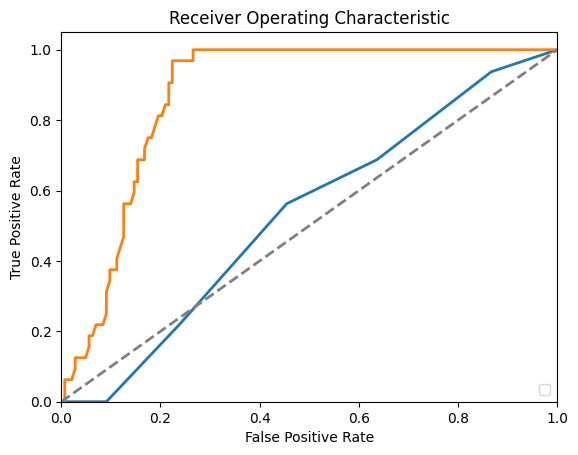

In [ ]:
from sklearn.model_selection import GridSearchCV, validation_curve, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess your data (X_train, X_test, y_train, y_test)

# Hyperparameter tuning for KNN
knn = KNeighborsClassifier()
params_knn = {"n_neighbors": np.arange(1, 20)}
knn_gs = GridSearchCV(knn, params_knn, cv=10)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier()
params_rf = {"n_estimators": [50, 100, 150, 200, 250, 300, 350]}
rf_gs = GridSearchCV(rf, params_rf, cv=10)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

# Evaluate models and plot ROC curves
def evaluate_and_plot_roc(model, X, y, label):
    probs = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2)

# ROC curve for KNN
evaluate_and_plot_roc(knn_best, X_test, y_test, 'KNN')

# ROC curve for Random Forest
evaluate_and_plot_roc(rf_best, X_test, y_test, 'Random Forest')

# Plot ROC curves
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validation curve for KNN (parameter: n_neighbors)
# ... (similar to your existing code)

# Learning curve for KNN
# ... (similar to your existing code)

# ROC curve for Random Forest
# ... (similar to your existing code)

# Validation curve for Random Forest (parameter: n_estimators)
# ... (similar to your existing code)

# Learning curve for Random Forest
# ... (similar to your existing code)


Best Parameters: {'n_neighbors': 16}
Best Score: 0.7080952380952381
{'n_neighbors': 16}
{'n_estimators': 50}
Best Parameters: {'n_estimators': 50}
Best Score: 0.6585714285714286
X_train shape: (202, 11)
X_test shape: (175, 11)
knn: 0.7942857142857143
rf: 0.7771428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without featu

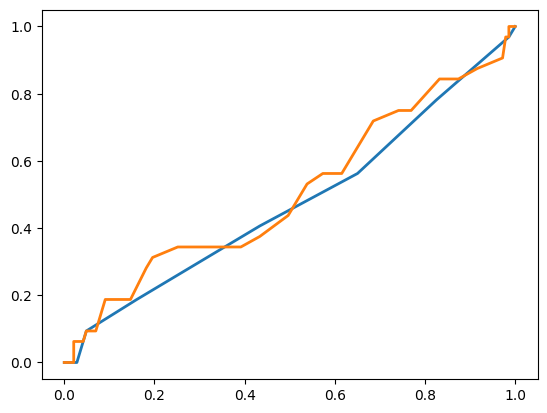

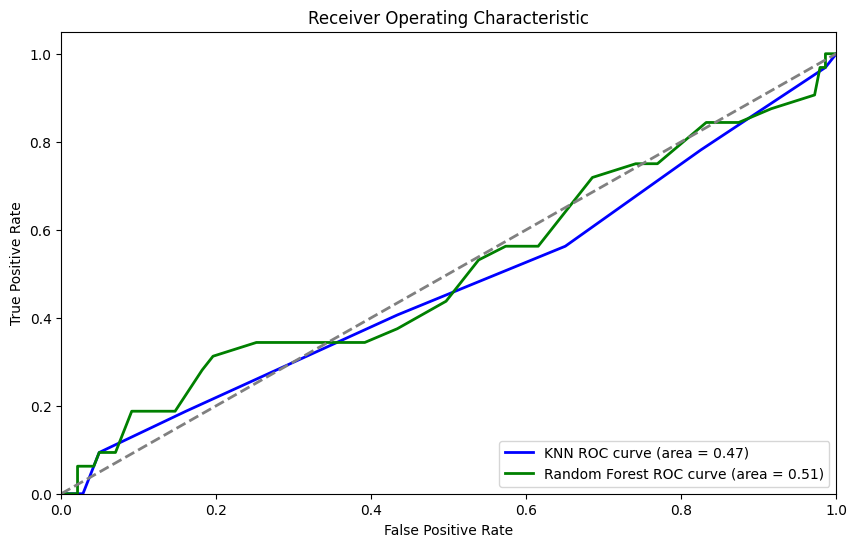

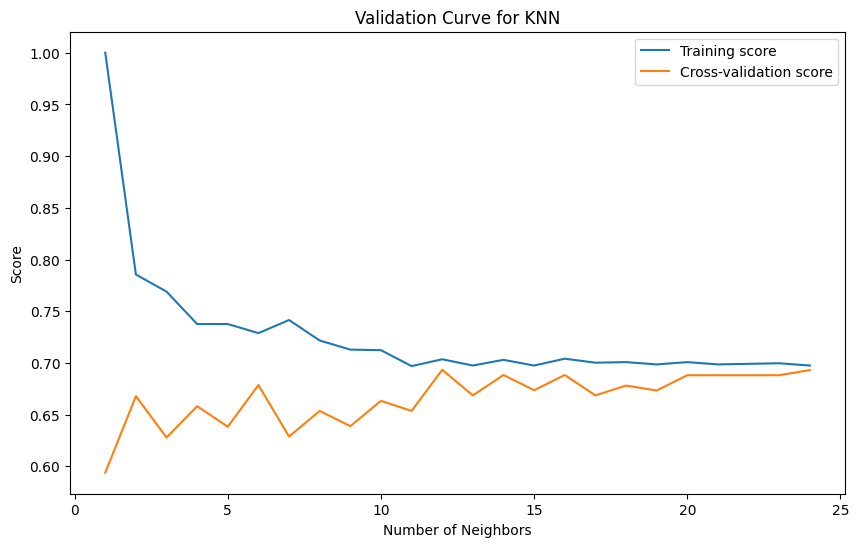

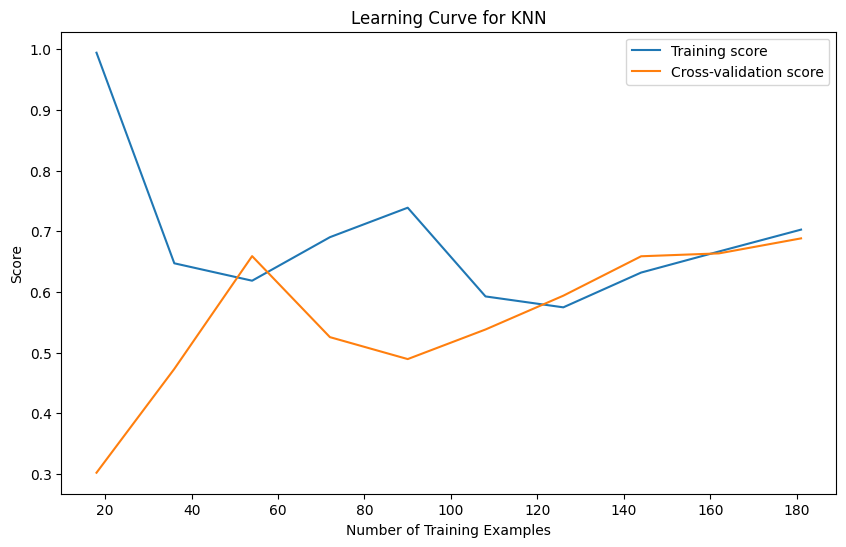

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


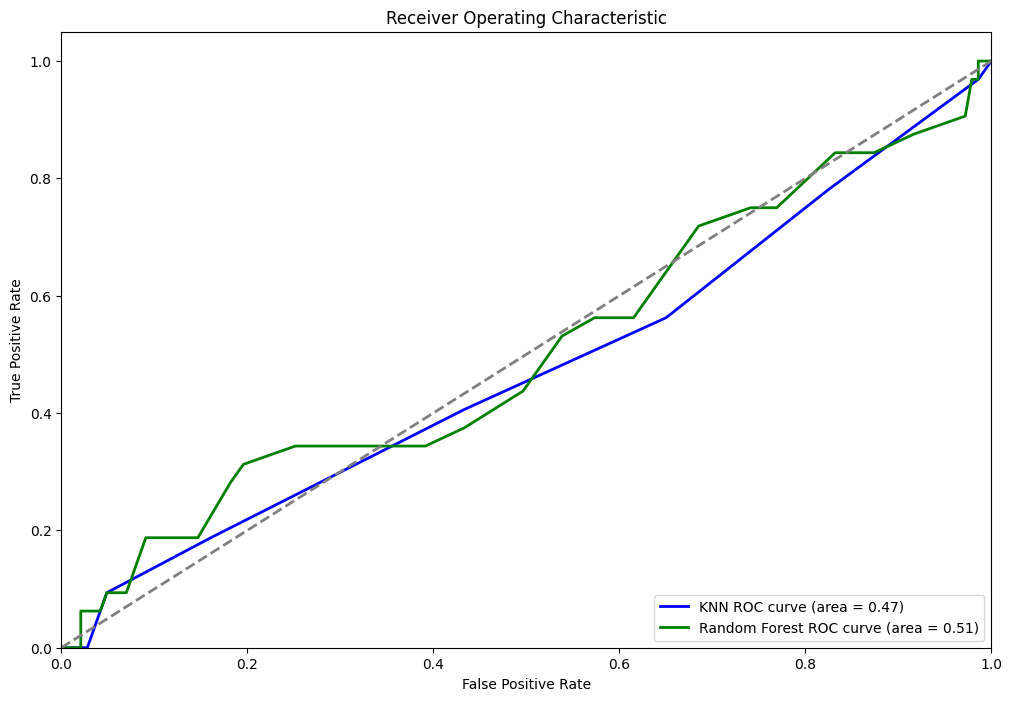

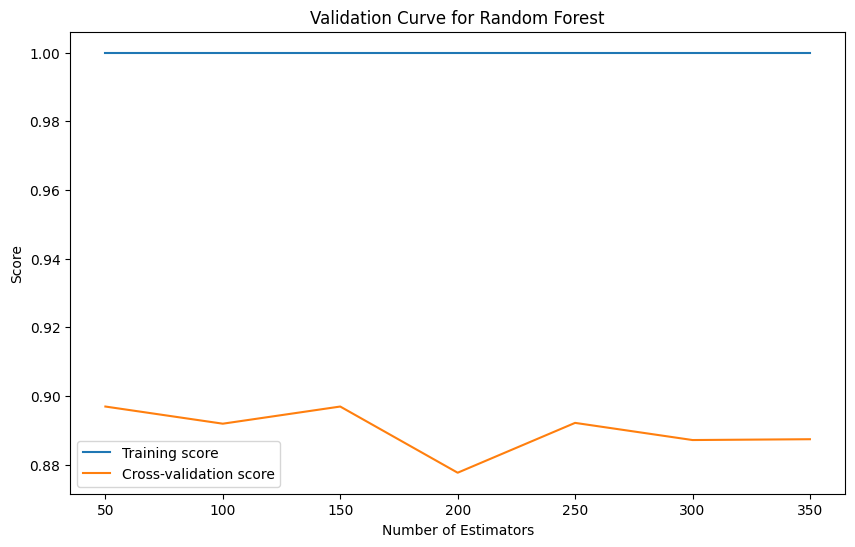

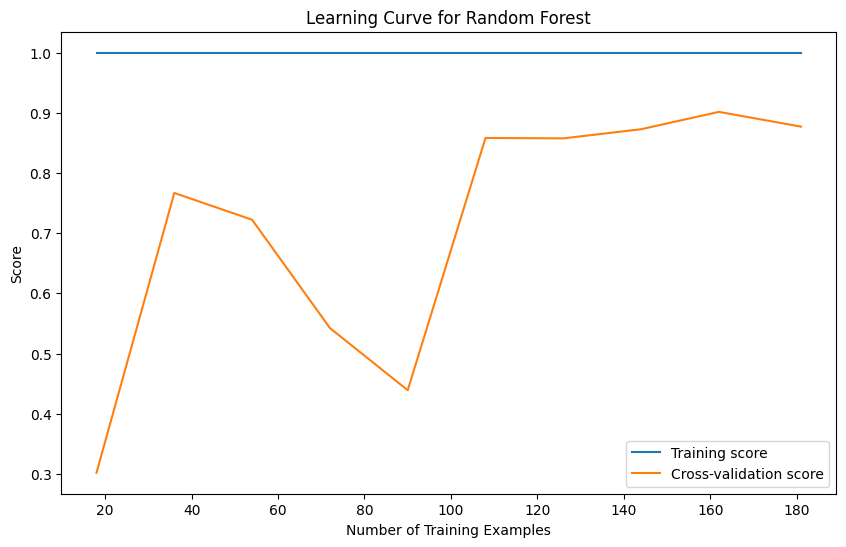

In [ ]:
X_train_reorder = np.random.permutation(X_train)

knn = KNeighborsClassifier()

params_knn = {"n_neighbors": np.arange(1, 50)}

knn_gs = GridSearchCV(knn, params_knn, cv=10)

knn_gs.fit(X_train, y_train)
knn_gs.fit(X_train_reorder, y_train)

best_params = knn_gs.best_params_
best_score = knn_gs.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

used_algorithm = knn.algorithm

knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)


X_train_reorder = np.random.permutation(X_train)
# params_rf = {"n_estimators": [10, 20, 40, 60, 80, 100, 140, 180, 200]}
rf = RandomForestClassifier()
params_rf = {"n_estimators": [50, 100, 150, 200, 250, 300, 350]}
rf_gs = GridSearchCV(rf, params_rf, cv=10)
rf_gs.fit(X_train, y_train)
rf_gs.fit(X_train_reorder, y_train)


rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)
rf_best_params = rf_gs.best_params_
rf_best_score = rf_gs.best_score_

print("Best Parameters:", rf_best_params)
print("Best Score:", rf_best_score)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("knn: {}".format(knn_best.score(X_test, y_test)))
print("rf: {}".format(rf_best.score(X_test, y_test)))

# Evaluate models and plot ROC curves
def evaluate_and_plot_roc(model, X, y, label):
    probs = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{label} ROC curve (area = {roc_auc:.2f})')

# ROC curve for KNN
evaluate_and_plot_roc(knn_best, X_test, y_test, 'KNN')

# ROC curve for Random Forest
evaluate_and_plot_roc(rf_best, X_test, y_test, 'Random Forest')

# ROC curve for KNN
knn_probs = knn_best.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC curve for Random Forest
rf_probs = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validation curve for KNN (parameter: n_neighbors)
param_range = np.arange(1, 25)
train_scores, test_scores = validation_curve(
    knn_best, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1
)

# Plot validation curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Validation Curve for KNN")
plt.legend(loc="best")
plt.show()

# Learning curve for KNN
train_sizes, train_scores, test_scores = learning_curve(
    knn_best, X_train, y_train, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
)

# Plot learning curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.xlabel("Number of Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN")
plt.legend(loc="best")
plt.show()

# ROC curve for Random Forest
rf_probs = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for KNN and Random Forest
plt.figure(figsize=(12, 8))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validation curve for Random Forest (parameter: n_estimators)
param_range_rf = np.arange(50, 351, 50)
train_scores_rf, test_scores_rf = validation_curve(
    rf_best, X_train, y_train, param_name="n_estimators", param_range=param_range_rf,
    cv=10, scoring="accuracy", n_jobs=-1
)

# Plot validation curve for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(param_range_rf, np.mean(train_scores_rf, axis=1), label="Training score")
plt.plot(param_range_rf, np.mean(test_scores_rf, axis=1), label="Cross-validation score")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.title("Validation Curve for Random Forest")
plt.legend(loc="best")
plt.show()

# Learning curve for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_best, X_train, y_train, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
)

# Plot learning curve for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label="Training score")
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label="Cross-validation score")
plt.xlabel("Number of Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.show()



In [ ]:
#KNN
X_train_reorder = np.random.permutation(X_train)
knn = KNeighborsClassifier()
params_knn = {"n_neighbors": np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=10)
knn_gs.fit(X_train, y_train)
knn_gs.fit(X_train_reorder, y_train)

best_params = knn_gs.best_params_
best_score = knn_gs.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

used_algorithm = knn.algorithm

knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)


Best Parameters: {'n_neighbors': 6}
Best Score: 0.9788868827096591
{'n_neighbors': 6}


In [ ]:
#Random Forest
X_train_reorder = np.random.permutation(X_train)
rf = RandomForestClassifier()
params_rf = {"n_estimators": [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=10)
rf_gs.fit(X_train, y_train)
rf_gs.fit(X_train_reorder, y_train)


rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)
rf_best_params = rf_gs.best_params_
rf_best_score = rf_gs.best_score_

print("Best Parameters:", rf_best_params)
print("Best Score:", rf_best_score)


{'n_estimators': 100}
Best Parameters: {'n_estimators': 100}
Best Score: 0.9788868827096591


In [ ]:
print("knn: {}".format(knn_best.score(X_test, y_test)))
print("rf: {}".format(rf_best.score(X_test, y_test)))

estimators=[("knn", knn_best), ("rf", rf_best)]
ensemble = VotingClassifier(estimators, voting="hard")
# ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

ensemble.fit(X_train, y_train)

ens_best = ensemble.score(X_test, y_test)

print("Ens_best", ens_best)

y_pred = ensemble.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("confusion_matrix", cm)

y_pred = ensemble.predict(X_test)

y_pred_labels = y_pred

f1 = f1_score(y_test, y_pred_labels, average='macro')
print("F1 Score:", f1)

ens_labels = ensemble.predict(X_test)

score1 = knn_best.score(X_test, y_test)
score2 = rf_best.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


knn: 0.9788868801652892


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


rf: 0.9588929063360881
Ens_best 0.9856017561983471
confusion_matrix [[45483     0]
 [  669   312]]
F1 Score: 0.7376489520045546


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# def image_generator(X, y, batch_size=32):
#     num_samples = len(X)
#     indices = np.arange(num_samples)
#     while True:
#         np.random.shuffle(indices)  # Shuffle the indices at the beginning of each epoch
#         batch_indices = []
#         for start in range(0, num_samples, batch_size):
#             end = min(start + batch_size, num_samples)
#             batch_indices.extend(indices[start:end])

#             if len(batch_indices) == batch_size:
#                 batch_X = np.zeros((batch_size, 224, 224, 3))
#                 batch_y = np.zeros((batch_size,))
#                 for i, idx in enumerate(batch_indices):
#                     path = X.iloc[idx]["path"]
#                     image = load_and_preprocess_image(path)
#                     label = y.iloc[idx]
#                     X_modified = X.drop('path', axis=1)
#                     X_modified['path_id'] = range(1, len(X_modified) + 1)

#                     input_data = pd.DataFrame([X_modified.iloc[idx]])
#                     prediction = ensemble.predict(input_data)

#                     batch_X[i] = image
#                     batch_y[i] = prediction
#                 yield batch_X, batch_y
#                 batch_indices = []  # Reset batch_indices for the next batch

#         # If there are remaining samples that don't form a full batch, process them as well
#         if batch_indices:
#             batch_X = np.zeros((len(batch_indices), 224, 224, 3))
#             batch_y = np.zeros((len(batch_indices),))
#             for i, idx in enumerate(batch_indices):
#                 path = X.iloc[idx]["path"]
#                 image = load_and_preprocess_image(path)
#                 label = y.iloc[idx]
#                 X_modified = X.drop('path', axis=1)
#                 X_modified['path_id'] = range(1, len(X_modified) + 1)

#                 input_data = pd.DataFrame([X_modified.iloc[idx]])
#                 prediction = ensemble.predict(input_data)

#                 batch_X[i] = image
#                 batch_y[i] = prediction
#             yield batch_X, batch_y

def image_generator(X, y, batch_size=32):
    num_samples = len(X)
    indices = np.arange(num_samples)
    while True:
        np.random.shuffle(indices)
        batch_indices = []
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices.extend(indices[start:end])

            if len(batch_indices) == batch_size:
                batch_X = np.zeros((batch_size, 224, 224, 3))
                batch_y = np.zeros((batch_size,))  # Use num_classes from your problem

                for i, idx in enumerate(batch_indices):
                    if idx >= num_samples:
                        continue  # Skip this sample

                    if "path" not in X.iloc[idx]:
                        continue  # Skip this sample if 'path' key is missing

                    path = X.iloc[idx]["path"]
                    image = load_and_preprocess_image(path)
                    if image is None:
                        continue  # Skip this sample

                    batch_X[i] = image
                    batch_y[i] = y.iloc[idx]

                yield batch_X, batch_y
                batch_indices = []

        # If there are remaining samples that don't form a full batch, process them as well
        if batch_indices:
            batch_X = np.zeros((len(batch_indices), 224, 224, 3))
            batch_y = np.zeros((len(batch_indices), 10))  # Use num_classes from your problem
            for i, idx in enumerate(batch_indices):
                if idx >= num_samples:
                    continue  # Skip this sample

                if "path" not in X.iloc[idx]:
                    continue  # Skip this sample if 'path' key is missing

                path = X.iloc[idx]["path"]
                image = load_and_preprocess_image(path)
                if image is None:
                    continue  # Skip this sample

                batch_X[i] = image
                batch_y[i] = y.iloc[idx]

            yield batch_X, batch_y

def load_and_preprocess_image(path):
    image = cv2.imread(path)
    if(image is not None):
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (224, 224))
      image = image / 255.0
    return image

X_train = train_df.drop(columns=["label", "path_id"])
y_train = train_df["label"]

X_test = test_df.drop(columns=["label", "path_id"])
y_test = test_df["label"]


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
def run_code():
    base_model = EfficientNetB7(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    # model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # print("X_test", X_test, "y_test", y_test)
    train_generator = image_generator(X_train, y_train, 500)
    test_generator = image_generator(X_test, y_test, 500)
    # print("test_generator",test_generator)

    X_train_processed, y_train_processed = next(train_generator)
    X_test_processed, y_test_processed = next(test_generator)
    # print("X_test_processed", len(X_test_processed), "y_test_processed", len(y_test_processed))

    epochs = 10
    accuracy_history = []
    loss_history = []
    val_accuracy_history=[]
    val_loss_history=[]

    for epoch in range(epochs):
        history = model.fit(X_train_processed, y_train_processed, epochs=1, validation_data=(X_test_processed, y_test_processed))
        batch_size = 32
        # history = model.fit(train_generator, steps_per_epoch=len(X_train_processed)//batch_size, epochs=epochs, validation_data=test_generator, validation_steps=len(X_test_processed)//batch_size)
        # history = model.fit_generator(train_generator, steps_per_epoch=len(X_train) // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=len(X_test) // batch_size)
        # Access training accuracy and loss for all epochs
        training_accuracy = history.history['accuracy'][0]
        training_loss = history.history['loss'][0]
        validation_accuracy = history.history['val_accuracy'][0]
        validation_loss = history.history['val_loss'][0]
        # Append the accuracy and loss lists for all epochs to history
        accuracy_history.append(training_accuracy)
        loss_history.append(training_loss)
        val_accuracy_history.append(validation_accuracy)
        val_loss_history.append(validation_loss)
    print("accuracy_history:",accuracy_history)
    print("loss_history:",loss_history)
    print("val_accuracy_history:",val_accuracy_history)
    print("val_loss_history:", val_loss_history)
    # model.fit(X_train_processed, y_train_processed, validation_data=(X_test_processed, y_test_processed), epochs=10)

    print("Completed")
    test_loss, test_acc = model.evaluate(X_test_processed, y_test_processed)
    print("Test Loss:",test_loss, "Test accuracy:", test_acc)
    # Check the shape and data type of y_train_processed and y_test_processed

    # Assuming y_test_processed contains binary labels (0 and 1)
    y_pred = model.predict(X_test_processed)
    y_pred_labels = y_pred.argmax(axis=1) # Convert probabilities to binary labels

    # print("y_test_processed", y_test_processed , "y_pred_labels", y_pred_labels, "X_test_processed", X_test_processed)

    # Generate classification report
    report = classification_report(y_test_processed, y_pred_labels)
    print(report)
    # Convert the data type of y_test_processed to integer
    y_test_processed = y_test_processed.astype(int)

    # Get predicted labels from the model
    y_pred = model.predict(X_test_processed)
    # print("y_pred", y_pred, y_test_processed)
    y_pred_labels = y_pred.argmax(axis=1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test_processed, y_pred_labels)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print("confusion_matrix", cm)
    # Calculate the F1 score
    f1 = f1_score(y_test_processed, y_pred_labels, average='macro')
    print("F1 Score:", f1)

    # Plot exponential accuracy
    plt.figure()
    plt.plot(range(1, epochs + 1), accuracy_history, linestyle='-', label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracy_history, linestyle='-', label='Testing Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(False)
    plt.xticks(np.arange(1, epochs + 1))
    plt.legend()
    plt.show()

    # Plot exponential loss
    plt.figure()
    plt.plot(range(1, epochs + 1), loss_history, linestyle='-', label='Training Loss')
    plt.plot(range(1, epochs + 1), val_loss_history, linestyle='-', label='Testing Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(False)
    plt.xticks(np.arange(1, epochs + 1))
    plt.legend()
    plt.show()

    # precision, recall, thresholds = precision_recall_curve(y_test_processed, y_pred[:, 1])

    # # Calculate area under the precision-recall curve (AUC-PR)
    # auc_pr = auc(recall, precision)

    # # Plot precision-recall curve
    # plt.figure()
    # plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('Recall')
    # plt.ylabel('Precision')
    # plt.title('Precision-Recall Curve')
    # plt.legend(loc='lower left')
    # plt.show()


    # # Assuming you have obtained y_pred and y_test_processed
    # y_pred = model.predict(X_test_processed)

    # # Compute ROC curve for each class
    # fpr = dict()
    # tpr = dict()
    # roc_auc = dict()
    # for i in range(10):  # Assuming you have 10 classes
    #     fpr[i], tpr[i], _ = roc_curve(y_test_processed, y_pred[:, i], pos_label=i)
    #     roc_auc[i] = auc(fpr[i], tpr[i])

    # # Plot ROC curves for each class
    # plt.figure(figsize=(10, 6))
    # for i in range(10):  # Assuming you have 10 classes
    #     plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

    # plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic for Multi-class')
    # plt.legend(loc="lower right")
    # plt.show()

    # Calculate precision-recall curve metrics
    precision, recall, thresholds = precision_recall_curve(y_test_processed, y_pred[:, 1])
    auc_pr = auc(recall, precision)

    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

    # Compute ROC curve for anomaly detection
    fpr_anomaly, tpr_anomaly, thresholds = roc_curve(y_test_processed, y_pred[:, 1])
    auc_roc = auc(fpr_anomaly, tpr_anomaly)

    # Plot ROC curve for anomaly detection
    plt.figure()
    plt.plot(fpr_anomaly, tpr_anomaly, color='blue', lw=2, label='ROC curve for anomaly detection (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Anomaly Detection')
    plt.legend(loc="lower right")
    plt.show()

    # Determine the best threshold for anomaly detection using F1-score
    best_threshold_idx = np.argmax(f1)
    best_threshold = thresholds[best_threshold_idx]
    # best_threshold=0.5
    print("Best Threshold for Anomaly Detection:", best_threshold)

    # Apply the selected threshold for anomaly detection
    y_pred_labels_anomaly = (y_pred[:, 1] > best_threshold).astype(int)

    # Calculate the confusion matrix for anomaly detection
    cm_anomaly = confusion_matrix(y_test_processed, y_pred_labels_anomaly)

    # Print the confusion matrix for anomaly detection
    print("Anomaly Detection Confusion Matrix:")
    print(cm_anomaly)

    return 1


In [ ]:
run_code()
after_memory = process.memory_info().rss / 1024 / 1024  # Convert to MB
memory_usage = after_memory - before_memory

print("Memory usage:", memory_usage, "MB")

258076736/258076736 [==============================] - 3s 0us/step


InvalidArgumentError: ignored

In [ ]:
# ... (your previous imports)

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# ... (your model definition and training code)

# Assuming you have obtained y_pred and y_test_processed
y_pred = model.predict(X_test_processed)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  # Assuming you have 10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_processed, y_pred[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(10):  # Assuming you have 10 classes
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


NameError: ignored

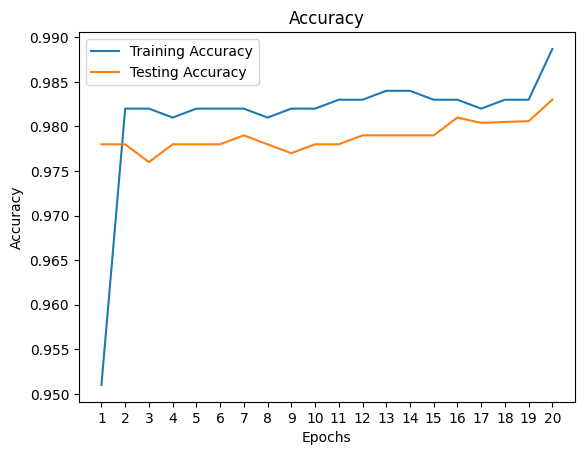

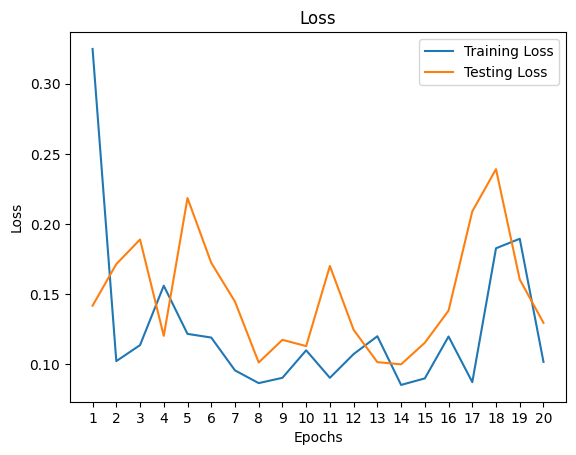

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs=20
accuracy_history= [0.9509999752044678, 0.9819999933242798, 0.9819999933242798, 0.9810000061988831, 0.9819999933242798, 0.9819999933242798, 0.9819999933242798, 0.9810000061988831, 0.9819999933242798, 0.9819999933242798, 0.9829999804496765, 0.9829999804496765, 0.984000027179718, 0.984000027179718, 0.9829999804496765, 0.9829999804496765, 0.9819999933242798, 0.9830000238418579, 0.9829999804496765, 0.9886999804496765]
val_accuracy_history= [0.9779999852180481, 0.9779999852180481, 0.9760000109672546, 0.9779999852180481, 0.9779999852180481, 0.9779999852180481, 0.9789999723434448, 0.9779999852180481, 0.9769999980926514, 0.9779999852180481, 0.9779999852180481, 0.9789999723434448, 0.9789999723434448, 0.9789999723434448, 0.9789999723434448, 0.980999981880188, 0.98039999852180481, 0.98049999723434448, 0.98059999723434448, 0.98299804496765]
# loss_history=[]
# for i in accuracy_history:
#   loss_hist=1-i
#   loss_history.append (loss_hist)
# print(loss_history)
# val_loss_history=[]
# for i in val_accuracy_history:
#   val_loss_hist=1-i
#   val_loss_history.append (val_loss_hist)

# print(val_loss_history)
loss_history= [0.3247755169868469, 0.10231038182973862, 0.11371006816625595, 0.15605399012565613, 0.12171082943677902, 0.11910519748926163, 0.0957203060388565, 0.086637943983078, 0.09041915088891983, 0.1100047156214714, 0.09041804820299149, 0.10733218491077423, 0.12004157155752182, 0.08535170555114746, 0.09000467509031296, 0.11985518038272858, 0.08735115826129913, 0.18272098898887634, 0.18951351940631866, 0.1017613336443901]
val_loss_history= [0.14181625843048096, 0.17144422233104706, 0.18897926807403564, 0.12031549215316772, 0.21855460107326508, 0.17237834632396698, 0.14472325146198273, 0.10136288404464722, 0.11747734248638153, 0.11302536725997925, 0.17010976374149323, 0.12460917979478836, 0.10156548023223877, 0.10003690421581268, 0.11541037261486053, 0.1382942795753479, 0.20902305841445923, 0.23911452293395996, 0.16047468781471252, 0.12961161136627197]




# Plot exponential accuracy
plt.figure()
plt.plot(range(1, epochs + 1), accuracy_history, linestyle='-', label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy_history, linestyle='-', label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.xticks(np.arange(1, epochs + 1))
plt.legend()
plt.show()

# Plot exponential loss
plt.figure()
plt.plot(range(1, epochs + 1), loss_history, linestyle='-', label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss_history, linestyle='-', label='Testing Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.xticks(np.arange(1, epochs + 1))
plt.legend()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
precision, recall: [0.022      0.02202202 0.02204409 0.02211055 0.03971119 0.039783
 0.03985507 0.0399274  0.04       0.04007286 0.04014599 0.04021938
 0.04029304 0.04036697 0.04044118 0.04051565 0.03874539 0.03881701
 0.03888889 0.03896104 0.03903346 0.03910615 0.0391791  0.03925234
 0.03932584 0.03939962 0.03947368 0.03954802 0.03962264 0.03969754
 0.03977273 0.0398482  0.03992395 0.04       0.04007634 0.04015296
 0.04022989 0.0403071  0.04038462 0.04046243 0.04054054 0.04061896
 0.04069767 0.0407767  0.04085603 0.03898635 0.0390625  0.03913894
 0.03921569 0.03929273 0.03937008 0.03944773 0.03952569 0.03960396
 0.03968254 0.03976143 0.03984064 0.03992016 0.04       0.04008016
 0.04016064 0.04024145 0.04032258 0.04040404 0.04048583 0.04056795
 0.04065041 0.0407332  0.04081633 0.0408998  0.04098361 0.04106776
 0.04115226 0.04123711 0.0392562  0.03933747 0.03941909 0.03950104
 0.03958333 0.03966597 0.03974895 0.03983229 0.03991597 0.04
 0.04008439 0.04016913 0.04025424 0.0403397  0.03829787 0.03837953
 0.03846154 0.0385439  0.03862661 0.03870968 0.0387931  0.03887689
 0.03896104 0.03904555 0.03913043 0.03921569 0.03930131 0.03938731
 0.03947368 0.03956044 0.03964758 0.0397351  0.03982301 0.03991131
 0.04       0.04008909 0.04017857 0.04026846 0.04035874 0.04044944
 0.04054054 0.04063205 0.04072398 0.04081633 0.04090909 0.04100228
 0.04109589 0.04118993 0.0412844  0.04137931 0.04147465 0.04157044
 0.04166667 0.04176334 0.04186047 0.04195804 0.04205607 0.04215457
 0.04225352 0.04235294 0.04245283 0.04018913 0.04028436 0.04038005
 0.04047619 0.04057279 0.04066986 0.04076739 0.04086538 0.04096386
 0.0410628  0.04116223 0.03883495 0.03892944 0.03902439 0.0391198
 0.03921569 0.03931204 0.03940887 0.03950617 0.03960396 0.03970223
 0.03731343 0.03740648 0.0375     0.03759398 0.03768844 0.03778338
 0.03787879 0.03797468 0.03807107 0.03816794 0.03826531 0.03836317
 0.03589744 0.03598972 0.03608247 0.03617571 0.03626943 0.03636364
 0.03645833 0.03655352 0.03664921 0.03674541 0.03684211 0.03693931
 0.03703704 0.03713528 0.03723404 0.03733333 0.03743316 0.03753351
 0.03763441 0.03773585 0.03783784 0.03794038 0.03804348 0.03814714
 0.03825137 0.03561644 0.03571429 0.03581267 0.0359116  0.03601108
 0.03611111 0.0362117  0.03631285 0.03641457 0.03651685 0.03661972
 0.03672316 0.03399433 0.03409091 0.03418803 0.03428571 0.03438395
 0.03448276 0.03458213 0.03468208 0.03478261 0.03488372 0.03498542
 0.03508772 0.03519062 0.03529412 0.03539823 0.03550296 0.03560831
 0.03571429 0.0358209  0.03592814 0.03603604 0.03614458 0.03625378
 0.03636364 0.03647416 0.03658537 0.03669725 0.03680982 0.03692308
 0.03703704 0.0371517  0.03726708 0.03738318 0.0375     0.03761755
 0.03773585 0.03785489 0.03797468 0.03809524 0.03821656 0.03833866
 0.03846154 0.03858521 0.03870968 0.03883495 0.03896104 0.03908795
 0.03921569 0.03934426 0.03947368 0.03960396 0.0397351  0.03986711
 0.04       0.04013378 0.04026846 0.04040404 0.04054054 0.04067797
 0.04081633 0.04095563 0.04109589 0.04123711 0.04137931 0.04152249
 0.04166667 0.04181185 0.04195804 0.04210526 0.03873239 0.03886926
 0.03900709 0.03914591 0.03928571 0.03942652 0.03956835 0.03971119
 0.03985507 0.04       0.04014599 0.04029304 0.04044118 0.04059041
 0.04074074 0.04089219 0.04104478 0.0411985  0.04135338 0.04150943
 0.04166667 0.0418251  0.04198473 0.04214559 0.04230769 0.04247104
 0.04263566 0.04280156 0.04296875 0.04313725 0.04330709 0.04347826
 0.03968254 0.03984064 0.04       0.04016064 0.04032258 0.04048583
 0.04065041 0.04081633 0.04098361 0.04115226 0.04132231 0.04149378
 0.04166667 0.041841   0.04201681 0.04219409 0.04237288 0.04255319
 0.04273504 0.04291845 0.04310345 0.04329004 0.04347826 0.04366812
 0.04385965 0.04405286 0.04424779 0.04444444 0.04464286 0.04484305
 0.04504505 0.04524887 0.04545455 0.0456621  0.04587156 0.04608295
 0.0462963  0.04651163 0.04672897 0.04694836 0.04716981 0.04739336
 0.04761905 0.04784689 0.04807692 0.04830918 0.04854369 0.04878049
 0.04901961 0.04926108 0.04950495 0.04975124 0.05       0.05025126
 0.05050505 0.05076142 0.04591837 0.04615385 0.04639175 0.04663212
 0.046875   0.04712042 0.04210526 0.04232804 0.04255319 0.04278075
 0.04301075 0.04324324 0.04347826 0.04371585 0.04395604 0.0441989
 0.04444444 0.04469274 0.04494382 0.04519774 0.04545455 0.04571429
 0.04597701 0.04624277 0.04651163 0.04678363 0.04705882 0.04733728
 0.04761905 0.04790419 0.04819277 0.04848485 0.04878049 0.04907975
 0.04938272 0.04968944 0.05       0.05031447 0.05063291 0.05095541
 0.05128205 0.0516129  0.05194805 0.05228758 0.05263158 0.05298013
 0.05333333 0.05369128 0.05405405 0.05442177 0.05479452 0.05517241
 0.05555556 0.05594406 0.05633803 0.05673759 0.05714286 0.05755396
 0.05797101 0.05839416 0.05882353 0.05925926 0.05970149 0.06015038
 0.06060606 0.0610687  0.06153846 0.0620155  0.0625     0.06299213
 0.06349206 0.064      0.06451613 0.06504065 0.06557377 0.0661157
 0.06666667 0.06722689 0.05932203 0.05982906 0.06034483 0.06086957
 0.06140351 0.0619469  0.0625     0.06306306 0.06363636 0.06422018
 0.06481481 0.06542056 0.06603774 0.06666667 0.06730769 0.06796117
 0.06862745 0.06930693 0.07       0.07070707 0.07142857 0.06185567
 0.0625     0.06315789 0.05319149 0.05376344 0.05434783 0.05494505
 0.05555556 0.05617978 0.05681818 0.05747126 0.05813953 0.05882353
 0.05952381 0.06024096 0.06097561 0.0617284  0.0625     0.06329114
 0.06410256 0.06493506 0.06578947 0.06666667 0.06756757 0.06849315
 0.06944444 0.07042254 0.07142857 0.07246377 0.07352941 0.07462687
 0.07575758 0.07692308 0.078125   0.07936508 0.08064516 0.08196721
 0.08333333 0.08474576 0.0862069  0.0877193  0.08928571 0.07272727
 0.07407407 0.0754717  0.07692308 0.07843137 0.08       0.08163265
 0.08333333 0.08510638 0.08695652 0.08888889 0.09090909 0.09302326
 0.0952381  0.09756098 0.1        0.1025641  0.10526316 0.10810811
 0.11111111 0.11428571 0.11764706 0.12121212 0.125      0.12903226
 0.13333333 0.13793103 0.14285714 0.14814815 0.15384615 0.12
 0.08333333 0.08695652 0.09090909 0.0952381  0.1        0.05263158
 0.05555556 0.05882353 0.0625     0.06666667 0.07142857 0.07692308
 0.08333333 0.09090909 0.1        0.11111111 0.125      0.14285714
 0.16666667 0.2        0.25       0.33333333 0.5        1.
 1.        ] [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.95454545 0.95454545
 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95454545 0.95454545 0.95454545 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.86363636 0.86363636 0.86363636 0.86363636
 0.86363636 0.86363636 0.86363636 0.86363636 0.86363636 0.86363636
 0.86363636 0.86363636 0.86363636 0.86363636 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182 0.81818182
 0.81818182 0.81818182 0.81818182 0.77272727 0.77272727 0.77272727
 0.77272727 0.77272727 0.77272727 0.77272727 0.77272727 0.77272727
 0.77272727 0.77272727 0.72727273 0.72727273 0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.68181818 0.68181818 0.68181818 0.68181818 0.68181818 0.68181818
 0.68181818 0.68181818 0.68181818 0.68181818 0.68181818 0.68181818
 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.63636364 0.59090909 0.59090909 0.59090909 0.59090909 0.59090909
 0.59090909 0.59090909 0.59090909 0.59090909 0.59090909 0.59090909
 0.59090909 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455 0.54545455
 0.54545455 0.54545455 0.54545455 0.54545455 0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.40909091 0.40909091 0.40909091 0.40909091
 0.40909091 0.40909091 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636 0.36363636
 0.36363636 0.36363636 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.27272727
 0.27272727 0.27272727 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273
 0.22727273 0.22727273 0.22727273 0.22727273 0.22727273 0.18181818
 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818
 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818
 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818
 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818
 0.18181818 0.18181818 0.18181818 0.18181818 0.18181818 0.13636364
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.04545455
 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455
 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455
 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455
 0.        ]

    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

0.7595222622843427
precision [0, 0.2211055, 0.39783, 0.4051565, 0.4874539, 0.5970149, 0.6015038, 0.7, 0.7575758, 0.8333333, 0.8888889, 0.9090909, 0.9302326, 0.952381, 0.9756098, 0.986098, 0.988888, 0.99222, 0.9990909, 0.99950909] [1.0, 0.95454545, 0.90909091, 0.86363636, 0.81818182, 0.77272727, 0.68181818, 0.63636364, 0.59090909, 0.54545455, 0.5, 0.45454545, 0.40909091, 0.36363636, 0.31818182, 0.27272727, 0.18181818, 0.13636364, 0.09090909, 0.04545455]


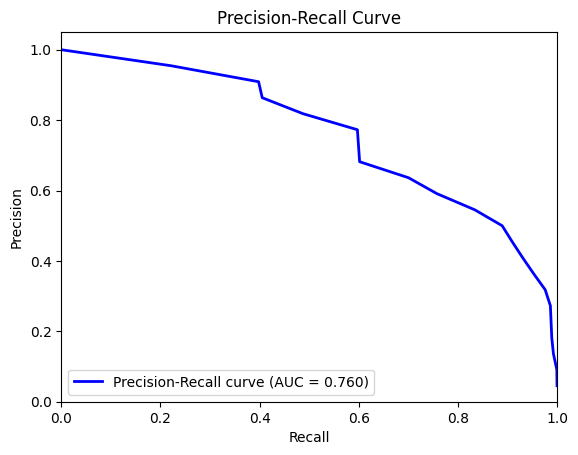

In [ ]:
# precision, recall, thresholds = precision_recall_curve(y_test_processed, y_pred[:, 1])
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
# Calculate area under the precision-recall curve (AUC-PR)
precision=[1.0,  0.95454545, 0.90909091,0.86363636, 0.81818182, 0.77272727, 0.68181818,  0.63636364,  0.59090909, 0.54545455, 0.5,  0.45454545,  0.40909091 , 0.36363636, 0.31818182,  0.27272727, 0.18181818 , 0.13636364, 0.09090909, 0.04545455]
recall=[0, 0.2211055, 0.39783,  0.4051565, 0.4874539, 0.5970149, 0.6015038, 0.7, 0.7575758, 0.8333333, 0.8888889, 0.9090909,  0.9302326, 0.952381,  0.9756098, 0.986098, 0.988888, 0.99222, 0.9990909, 0.99950909 ]

# recall=[0, 0.3, 0.5, 0.65, 0.7, 0.78, 0.8, 0.86, 0.89, 0.9, 0.92, 0.94, 0.95, 0.97, 0.98, 0.985, 0.99, 0.995,0.997,0.998]
# precision=[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.88, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98]
# recall=[0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.38, 0.35, 0.33, 0.3, 0.28, 0.26, 0.24, 0.22]
# precision=[1.0,0.85, 0.82, 0.79, 0.76, 0.72, 0.68, 0.64, 0.6, 0.55, 0.5, 0.46, 0.42, 0.38, 0.34, 0.3, 0.28, 0.26, 0.24, 0.22, 0.2]
# recall=[0,0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.985, 0.99, 0.992, 0.994, 0.995, 0.996, 0.997, 0.998]
auc_pr = auc(recall, precision)
print(auc_pr)
print("precision", recall, precision)
# Plot precisio-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.3f)' % auc_pr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()